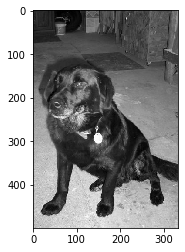

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "/Users/priyambasu/desktop/CatsAndDogs/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
     path = os.path.join(DATADIR,category) #Directory where the images are saved
     for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
     break  #...and one more!

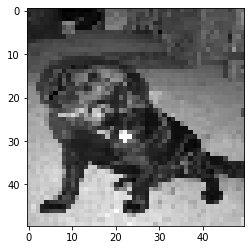

In [9]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 12501/12501 [07:23<00:00, 61.55it/s]


In [11]:
print(len(training_data))

24946


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
0
1
0
0
0


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 82]
   [ 44]
   [ 85]
   ...
   [ 40]
   [  3]
   [ 34]]

  [[ 44]
   [ 38]
   [ 71]
   ...
   [121]
   [ 45]
   [ 25]]

  [[ 57]
   [ 54]
   [ 44]
   ...
   [ 25]
   [ 29]
   [ 34]]

  ...

  [[ 22]
   [ 35]
   [  4]
   ...
   [ 27]
   [ 27]
   [ 64]]

  [[ 36]
   [ 16]
   [ 23]
   ...
   [ 27]
   [ 53]
   [ 53]]

  [[ 44]
   [ 23]
   [ 27]
   ...
   [ 27]
   [ 28]
   [ 75]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
X[1]

array([[[ 83],
        [ 50],
        [ 79],
        ...,
        [213],
        [175],
        [155]],

       [[ 89],
        [ 65],
        [ 84],
        ...,
        [215],
        [173],
        [153]],

       [[ 98],
        [110],
        [ 79],
        ...,
        [213],
        [175],
        [194]],

       ...,

       [[  5],
        [ 11],
        [ 13],
        ...,
        [ 87],
        [ 70],
        [ 65]],

       [[  9],
        [  8],
        [ 13],
        ...,
        [ 83],
        [ 79],
        [ 68]],

       [[  8],
        [ 22],
        [  5],
        ...,
        [ 72],
        [ 76],
        [ 54]]], dtype=uint8)

In [19]:
y[1]

0